In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, neighbors, svm
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv('drugsnew.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.3+ KB


In [5]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
data.shape

(200, 6)

Explonatory Data Analyst

In [8]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

D:\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


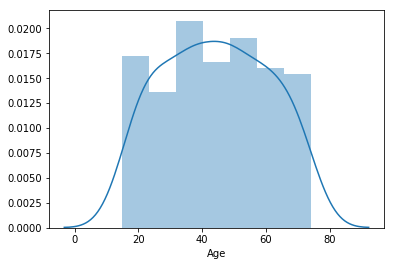

In [9]:
sns.distplot(data['Age'])

D:\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


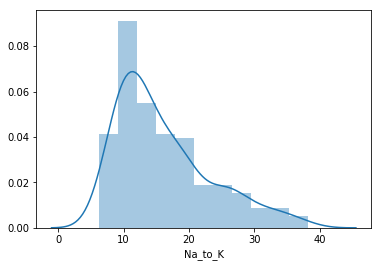

In [10]:
sns.distplot(data['Na_to_K'])

Grouping kolom age and na_to_k

In [15]:
age_groups = []
for i in data['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
data['AgeGroup'] = age_groups

In [16]:
na_to_k_groups = []
for i in data['Na_to_K']:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')
        
data['Na_to_K_groups'] = na_to_k_groups

In [17]:
data = data[['AgeGroup', 'Sex', 'BP', 'Cholesterol', 'Na_to_K_groups', 'Drug']]
data.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,DrugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,DrugY


Visualisasi

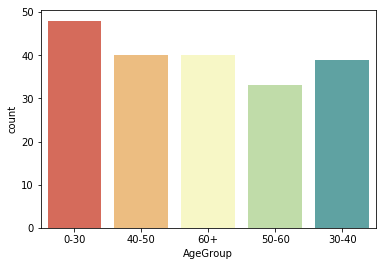

In [18]:
sns.countplot(x="AgeGroup", data=data, palette='Spectral')

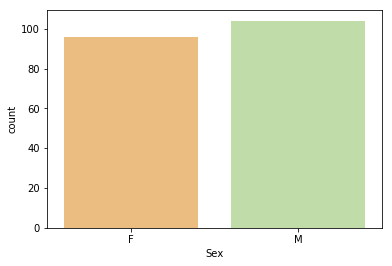

In [19]:
sns.countplot(x="Sex", data=data, palette='Spectral')

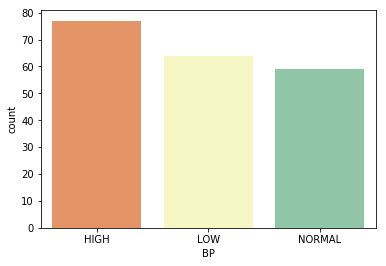

In [20]:
sns.countplot(x="BP", data=data, palette='Spectral')

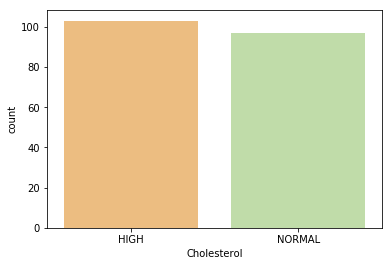

In [21]:
sns.countplot(x="Cholesterol", data=data, palette='Spectral')

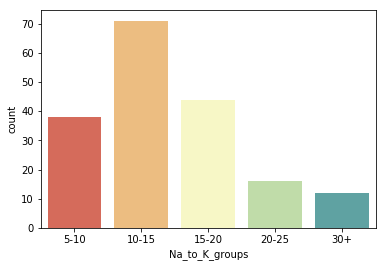

In [22]:
sns.countplot(x="Na_to_K_groups", data=data, palette='Spectral', order=['5-10', '10-15', '15-20', '20-25', '30+'])

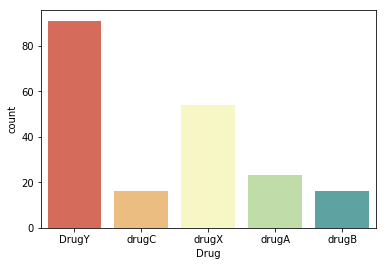

In [23]:
sns.countplot(x="Drug", data=data, palette='Spectral')

Frekuensi obat sangat tidak seimbang. Untuk masalah klasifikasi, idealnya memiliki jumlah variabel target yang serupa. Oleh karena itu kita akan menggunakan SMOTE (Synthetic Minority Oversampling Technique). SMOTE akan mengambil sampel obatA, obatB, obatC dan obatX secara berlebihan agar memiliki jumlah sampel yang sama dengan ObatY. Aspek sintetis dari teknik oversampling ini membantu menghindari overfitting, karena tidak hanya mengulang data yang ada. Pertama kita perlu membagi dataset menjadi set pelatihan dan pengujian dan mengubah data menjadi boneka.

In [38]:
#Data Split
x = data.drop('Drug',axis=1)
y = data['Drug']

In [42]:
#Data Scalling
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.75, test_size = 0.25)

In [44]:
x_train = pd.get_dummies(pd.DataFrame(x_train))
x_test = pd.get_dummies(pd.DataFrame(x_test))

Kami hanya menggunakan SMOTE pada data pelatihan. Data sintetis tidak boleh terlalu mirip dengan data asli sehingga menyebabkan overfitting, tetapi dengan hanya melakukan oversampling data pelatihan, kita akan mengetahuinya jika memang demikian.

In [45]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

[Text(0.5,0,'Drug')]

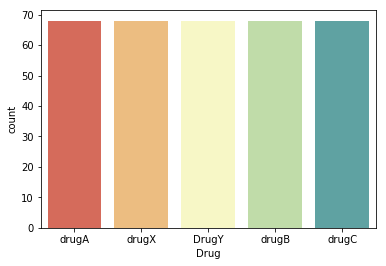

In [46]:
ax = sns.countplot(x=y_train, data=data, palette='Spectral')
ax.set(xlabel="Drug")

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9882352941176471
RandomForestClassifierModel Test Score is :  0.88
RandomForestClassifierModel features importances are :  [0.02027232 0.02893662 0.03126149 0.09500441 0.03731465 0.00880988
 0.01044923 0.19695428 0.12625571 0.11078552 0.04348735 0.05992891
 0.04819472 0.09756393 0.01861664 0.01891981 0.01025828 0.03698626]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  ['drugX' 'drugX' 'drugB' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugA' 'drugX'
 'drugC']
Prediction Probabilities Value for RandomForestClassifierModel is :  [[1.37777866e-01 3.37216418e-02 1.05065314e-02 6.34649218e-03
  8.11647468e-01]
 [4.13037643e-01 0.00000000e+00 7.08951340e-02 7.52990852e-04
  5.15314232e-01]
 [8.43743513e-02 3.21121165e-01 5.66670366e-01 9.13458142e-03
  1.86995358e-02]
 [9.72127756e-02 6.62691455e-01 1.80449707e-01 7.30458006e-03
  5.23414830e-02]
 [1.31297169e-01 4.68807327e-02 1.55065314e-02 6

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  44


In [51]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.88


# K Nearest Neighbours

In [52]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 ['drugX' 'DrugY' 'drugA' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugA' 'drugX'
 'drugB' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugC'
 'drugX' 'drugX' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugA'
 'DrugY' 'drugB' 'drugA' 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'] 
 Accuracy: 88.0 %


# Super Vector Machine

In [53]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 ['drugX' 'DrugY' 'drugB' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugA' 'drugX'
 'drugC' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugC'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugC'
 'drugX' 'drugX' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugA'
 'DrugY' 'drugC' 'drugB' 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'] 
 Accuracy: 100.0 %


# Logistic Regression

In [54]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 ['drugX' 'DrugY' 'drugB' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugA' 'drugX'
 'drugC' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugC'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugC'
 'drugX' 'drugX' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugA'
 'DrugY' 'drugC' 'drugB' 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugX' 'drugX'] 
 Accuracy: 100.0 %


# Ringkasan

In [55]:
pd.DataFrame(data={'Model': ['K-Nearest Neighbours', 'Support Vector Machine (SVM)', 'Logistic Regression'], 'Accuracy %': [knn_acc, svm_acc, log_reg_acc]})

,Model,Accuracy %
0,K-Nearest Neighbours,88.0
1,Support Vector Machine (SVM),100.0
2,Logistic Regression,100.0


# Kesimpulan

Support Vector Machine dan Logistic Regression berhasil memprediksi jenis obat yang harus diberikan 100%, lain hal nya dengan KNN hanya 88%. ini cukup masuk akal karena KNN dikenal dengan "Lazy Learning".